<a href="https://colab.research.google.com/github/usuario3pm/rnap-2025I/blob/main/Copia_de_Regression_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Linear regression

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#!ls

veamos los primeros 5 datos del archivo: 
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]

veamos sus dimensiones: 
dimensión de x,: (97,)
dimensión de y:  (97,)

veamos los datos en una grafica: 


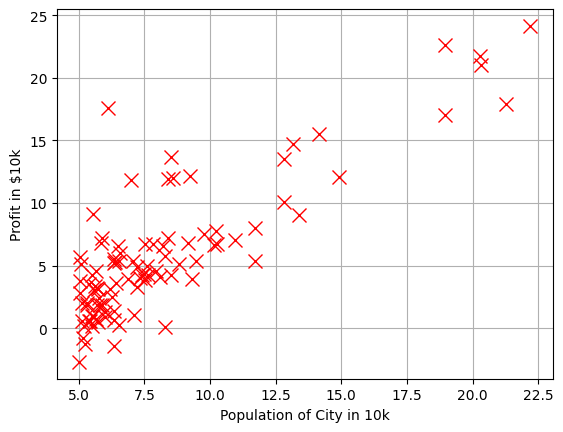

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data1.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print("veamos los primeros 5 datos del archivo: ")
print(data[0:5,:])
#load the data a create a np vectors X and y
X = data[:, 0]
y = data[:, 1]

print("\nveamos sus dimensiones: ")
print("dimensión de x,:", X.shape),print("dimensión de y: ",y.shape),


# Plot data
print("\nveamos los datos en una grafica: ")

plt.plot(X, y, 'rx', markersize=10)  # Red x for positive examples
plt.grid(True)  # Turn on the grid
plt.xlabel('Population of City in 10k')  # Label for x-axis
plt.ylabel('Profit in $10k')  # Label for y-axis
plt.show()





misma grafica pero con otro estilo...



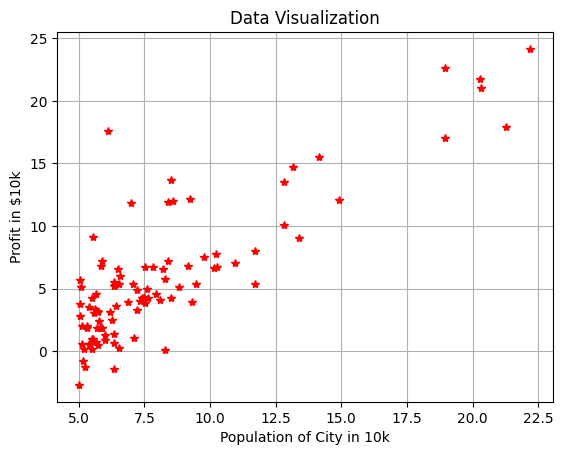

In [6]:
# ==================== Part 1: Plotting ====================

print('misma grafica pero con otro estilo...\n')
# Plot data
plt.plot(X, y, '*r', label='Profit')  # Red stars for positive examples
plt.grid(True)  # Turn on the grid
#plt.legend()    # Add legend
plt.xlabel('Population of City in 10k')  # Label for x-axis
plt.ylabel('Profit in $10k')  # Label for y-axis
plt.title('Data Visualization')  # Add a title
plt.show()

# Cost Function

The objective of linear regression is to minimize the cost function:
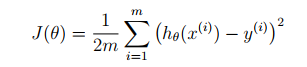

where the hypothesis h is given by

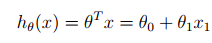

**Create a matrix by adding a column of ones to the vecto X**

You should expect to see a cost of approximately 32.07


In [7]:
# using numpy and scipy
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

import numpy as np
from scipy.optimize import minimize

#Implement cost function
def cost_function(theta, X, y):
    print("dimensión de theta: ",theta.shape)
    m = len(y)
    print("longitud de y : ",m)
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    J=0
    # añadir una colunma de unos a X
    if X.shape[1] != theta.shape[0]:
        print("añadiendo uno a la matriz para igual su forma")
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Ahora X tiene forma (97, 2)

    print("dimensión de X: ",X.shape)
    print(X[0:3,:])

    h = X.dot(theta)

    J = (1 / (2 * m)) * np.sum((h - y) ** 2)  # Calcular el costo
    return J

m = data.shape[0]
y = data[:, [1]]
X = data[:, [0]]  # Then, create a matrix by adding a column of ones to the vecto X

theta = np.zeros((2, 1)) # Look that theta is a vector 2x1
#print(f"Model parameters: {theta}")
print()
print(f"Cost function: {cost_function(theta, X, y )}") #You should expect to see a cost of approximately 32.07



dimensión de theta:  (2, 1)
longitud de y :  97
añadiendo uno a la matriz para igual su forma
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
Cost function: 32.072733877455676


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

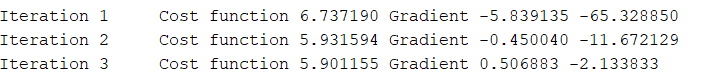



dimensión de theta:  (2, 1)
longitud de y :  97
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
Iteration 2	Cost: 6.737190
dimensión de theta:  (2, 1)
longitud de y :  97
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
Iteration 3	Cost: 5.931594
Theta found by gradient descent:  [0.06289175 0.77000978]
For population = 35,000, we predict a profit of 27579.26
For population = 35,000, we predict a profit of 54529.60


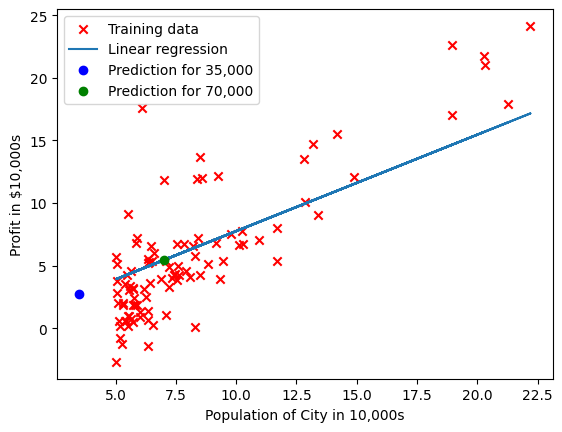

In [8]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 3
m = data.shape[0]
y = data[:, [1]]
X = data[:, [0]]
X = np.hstack([np.ones((m, 1)), X])
theta = np.zeros((2, 1))
alpha = 0.01
def gradientDescent(X, y, theta, alpha, iterations):
  m = len(y)  # number of training examples
  J_history = np.zeros(iterations)

  for iter in range(1,iterations):
  #Instructions: Perform a single gradient step on the parameter vector
  #               theta.
  #
  # Hint: While debugging, it can be useful to print out the values
  #       of the cost function (computeCostMulti) and gradient here.
      # Save the cost J in every iteration
      error = X @ theta - y
      gradient = (1/m) * (X.T @ error) # dirección y cuánto hay que ajustar theta 1/m es promedio y x.T@error es la derivada
      theta = theta - alpha * gradient # actualiza theta restando un poco del gradiente mediante la tasa de aprendizaje

      J_history[iter] = cost_function(theta,X, y)
      print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}")
  return theta # la solución que minimiza el error.

theta = gradientDescent(X, y, theta, alpha, iterations);
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]) @ theta
print(f'For population = 35,000, we predict a profit of {(predict1 * 10000).item():.2f}')

predict2 = np.array([1, 7.0]) @ theta
print(f'For population = 35,000, we predict a profit of {(predict2 * 10000).item():.2f}')


# Plot the linear fit
plt.scatter(X[:, 1], y, color='red', marker='x', label='Training data')  # X[:,1] is the feature (since X[:,0] is the bias term)
plt.plot(X[:, 1], X @ theta, label='Linear regression')  # X @ theta gives the predicted values
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(3.5, predict1.item(), 'ob', label='Prediction for 35,000')
plt.plot(7.0, predict2.item(), 'og', label='Prediction for 70,000')
plt.legend()
plt.show()

# Visualization

Se han truncado las últimas 5000 líneas del flujo de salida.
 [1.     5.5277]
 [1.     8.5186]]
dimensión de theta:  (2, 1)
longitud de y :  97
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
dimensión de theta:  (2, 1)
longitud de y :  97
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
dimensión de theta:  (2, 1)
longitud de y :  97
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
dimensión de theta:  (2, 1)
longitud de y :  97
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
dimensión de theta:  (2, 1)
longitud de y :  97
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
dimensión de theta:  (2, 1)
longitud de y :  97
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
dimensión de theta:  (2, 1)
longitud de y :  97
dimensión de X:  (97, 2)
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]]
dimensión de theta:  (2, 1)
l

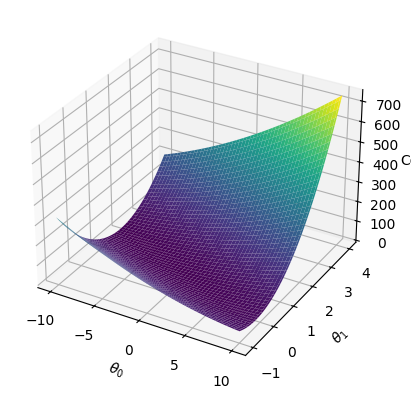

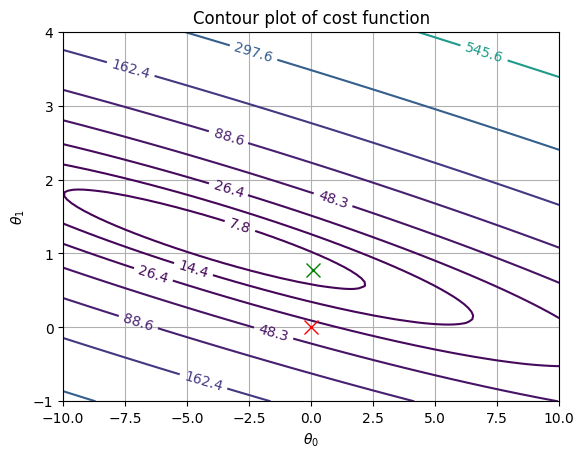

In [9]:
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

print('Visualizing J(theta_0, theta_1) ...')

theta_init = np.zeros((2, 1))
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = cost_function(t, X, y)

# Transpose J_vals to match the orientation of MATLAB's surf
J_vals = J_vals.T

# Surface plot
theta0_vals_mesh, theta1_vals_mesh = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals_mesh, theta1_vals_mesh, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')

# Contour plot
plt.figure()
cp = plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.clabel(cp)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

# Plot the final theta found by gradient descent
plt.plot(theta_init[0, 0], theta_init[1, 0], 'rx', markersize=10, linewidth=2)
plt.plot(theta[0, 0], theta[1, 0], 'gx', markersize=10, linewidth=2)
plt.title('Contour plot of cost function')
plt.grid(True)
plt.show()
